In [22]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr
import math
import matplotlib.pyplot as plt
import pickle
from sklearn.metrics import mean_squared_error
import seaborn as sns

In [23]:
smina_score = pd.read_csv('./smina_score_full.csv', index_col=0)

In [24]:
len(smina_score)

17636

In [25]:
smina_score

,ids,Score,True
208,1qi0,4.879590,2.35
12053,3kc1,6.273039,9.00
7264,2p3d,6.690921,6.74
13714,4myd,6.134681,4.55
16474,1a94,6.370236,7.85
...,...,...,...
5007,5akj,4.062673,5.86
8131,4tyo,5.722792,7.10
17435,3kdb,9.740252,9.85
8486,5kre,-0.777260,7.23


In [26]:
df = smina_score.sample(frac= 1)

In [27]:
smina_score = df

In [28]:
smina_score = smina_score[smina_score['Score'] > -20]

(array([3.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 4.000e+00,
        0.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 2.000e+00, 4.000e+00,
        3.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 3.000e+00, 4.000e+00,
        7.000e+00, 5.000e+00, 1.100e+01, 7.000e+00, 1.500e+01, 1.300e+01,
        1.000e+01, 1.600e+01, 2.500e+01, 3.100e+01, 3.900e+01, 3.700e+01,
        4.000e+01, 4.900e+01, 6.600e+01, 8.800e+01, 9.400e+01, 1.310e+02,
        2.030e+02, 2.370e+02, 3.040e+02, 3.900e+02, 5.030e+02, 5.700e+02,
        6.350e+02, 7.810e+02, 8.800e+02, 9.300e+02, 1.033e+03, 1.035e+03,
        1.163e+03, 1.167e+03, 1.110e+03, 1.083e+03, 9.570e+02, 8.110e+02,
        6.890e+02, 6.110e+02, 4.960e+02, 3.640e+02, 2.870e+02, 1.960e+02,
        1.510e+02, 1.090e+02, 6.200e+0

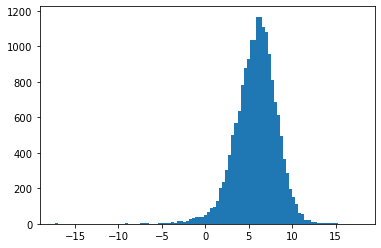

In [29]:
plt.hist(smina_score['Score'].values, bins= 100)

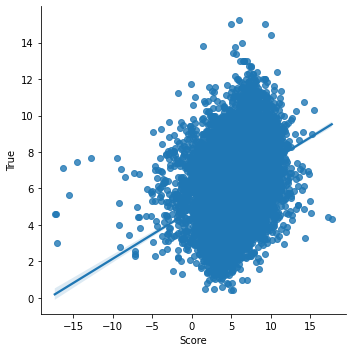

In [30]:
sns.lmplot(data=smina_score, x='Score', y='True' )

In [31]:
len(smina_score)

17625

In [32]:
smina_score_vals = smina_score.values
count = 0
key_index={}
for i in smina_score_vals:
    key = i[0]
    key_index[key] = count
    count += 1
    

In [33]:
plif_folds = pickle.load(open('./folds_using_16k_0.25_thresh_after_filtering.pkl', 'rb'))

In [43]:
pocketmatch_folds = pickle.load(open('folds_using_0.25_thresh_pocketmatch.pkl', 'rb'))

In [44]:
def get_vals(fold):
    preds = []
    trues = []
    for key in fold:
        try:
            vec = smina_score_vals[key_index[key]]
            true = vec[2]
            pred = vec[1]
            preds.append(pred)
            trues.append(true)
        except:
#             print(key)
            pass
    return preds, trues

In [45]:
import numpy as np

In [46]:
all_r = []
all_rmse = []
for i in [0,1,2]:

    preds, trues = get_vals(plif_folds[i])
    a = pearsonr(preds, trues)[0]
    all_r.append(pearsonr(preds, trues)[0])
    all_rmse.append(math.sqrt(mean_squared_error(preds, trues)))
    print('Pearson R Fold', i ,pearsonr(preds, trues)[0])
#     print('RMSE      ', math.sqrt(mean_squared_error(preds, trues)))

print('PLIF SMINA ')    
print('avg R', np.mean(all_r))
print('avg rmse ', np.mean(all_rmse))

Pearson R Fold 0 0.32701989040766305
Pearson R Fold 1 0.398720752721496
Pearson R Fold 2 0.3228661291586458
PLIF SMINA 
avg R 0.34953559076260166
avg rmse  2.524156577598806


In [47]:
all_r = []
all_rmse = []
for i in [0,1,2]:
    preds, trues = get_vals(pocketmatch_folds[i])
    all_r.append(pearsonr(preds, trues)[0])
    all_rmse.append(math.sqrt(mean_squared_error(preds, trues)))
    print('Pearson R fold ',i,pearsonr(preds, trues)[0])
#     print('RMSE      ', math.sqrt(mean_squared_error(preds, trues)))
print("POCKETMATCH SMINA")
print('avg R', np.mean(all_r))
print('avg rmse ', np.mean(all_rmse))

Pearson R fold  0 0.38765452741714457
Pearson R fold  1 0.30249703652562865
Pearson R fold  2 0.3565274478775328
POCKETMATCH SMINA
avg R 0.348893003940102
avg rmse  2.5242219249435682


In [48]:
for i in pocketmatch_folds:
    print(len(i))

5530
5530
5530


In [49]:
a = [[1,2,3],[4,2,3], [4,5,6]]

In [41]:
import random
random.shuffle(a)

In [42]:
a

[[1, 2, 3], [4, 5, 6], [4, 2, 3]]